# >>> INTRODUCTION <<<

HELLO THERE, THIS IS MY FIRST PROJECT USING PYTHON. THIS PROJECT IS ABOUT ANALYZING NETFLIX MOVIE AND TV SHOW DATA. I GOT THE DATASET FROM KAGGLE. 
SO, IN THIS PROJECT I WILL FIGURE OUT:
1) PERCENTAGE TYPE OF SHOW
2) NUMBER OF TITLE BY RELEASE YEAR OF YEAR 2000 AND MORE
3) TOP 5 MOVIES HAVE A LONGEST DURATION
4) TOP 5 TV SHOWS HAVE A MOST SEASON

# >>> DATA IMPORTING <<<

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import os

In [10]:
os.listdir(r"D:\DATA SCIENTIST BISMILLAH\revoU")

['DAMC-Friday-10 March.mp4',
 'DAMC-Friday-17 March.mp4',
 'DAMC-Thursday-16 March.mp4',
 'DAMC-Thursday-9 March.mp4',
 'DAMC-Tuesday-14 March.mp4',
 'DAMC-Tuesday-7 March.mp4',
 'DAMC-Wednesday-15 March.mp4',
 'DAMC-Wednesday-8 March.mp4',
 'netflix data.xlsx',
 'netflix_titles.csv',
 'netflix_titles.csv.zip']

In [11]:
netflix_file = pd.read_csv(r"D:\DATA SCIENTIST BISMILLAH\revoU/netflix_titles.csv")

# >>> DATA EXPLORING AND CLEANING <<<

In [12]:
netflix_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [13]:
netflix_file.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [14]:
# Checking the null and duplicate data

In [15]:
netflix_file.duplicated().sum()

0

In [16]:
netflix_file.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [17]:
#Drop the data that has a missing value
netflix_file= netflix_file.dropna(subset = ["duration"])
netflix_file= netflix_file.dropna(subset = ["date_added"])
netflix_file= netflix_file.dropna(subset = ["rating"])

In [18]:
#Check it again to make sure the row is deleted
netflix_file.isnull().sum()

show_id            0
type               0
title              0
director        2621
cast             825
country          829
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [19]:
netflix_file.shape

(8790, 12)

In [20]:
#Convert the string type of data time to datetime type
netflix_file['date_added']=pd.to_datetime(netflix_file['date_added'])

In [21]:
#Convert object to categorical data
netflix_file['type'] = netflix_file['type'].astype('category')

In [22]:
#access the year of datetime of "date added" column and add to a new column named "year_added"
netflix_file['year_added'] = netflix_file['date_added'].dt.year
netflix_file['year_added']

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
8802    2019
8803    2019
8804    2019
8805    2020
8806    2019
Name: year_added, Length: 8790, dtype: int64

In [23]:
#Check the type of column duration, try to see the first row
type(netflix_file["duration"][0])

str

In [24]:
#Strip/delete the string "min, Season, Seasons" in the colomn 'duration' then add to a variable named 'duration_trim'

In [25]:
#Because the 'duration' type is already a string dtype, so we can use the strip method to delete those words and store it to a variable named 'duration_trim'

In [26]:
netflix_file['duration_trim'] = netflix_file['duration'].str.strip(" min")
netflix_file['duration_trim'] = netflix_file['duration_trim'].str.strip(" Season")
netflix_file['duration_trim'] = netflix_file['duration_trim'].str.strip(" Season")

In [27]:
#Checking data

netflix_file.tail(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,duration_trim
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,2018,3
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,2019-12-31,2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...,2019,131
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,2018-02-15,2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...,2018,120
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",2016,1
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2016,96
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,158
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019,2
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,88
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,88
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,111


In [28]:
#Convert column 'duration_trim' as a string type to integer type
netflix_file['duration_trim'] = netflix_file['duration_trim'].astype('int')

In [29]:
#Make sure it converted
netflix_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        8790 non-null   object        
 1   type           8790 non-null   category      
 2   title          8790 non-null   object        
 3   director       6169 non-null   object        
 4   cast           7965 non-null   object        
 5   country        7961 non-null   object        
 6   date_added     8790 non-null   datetime64[ns]
 7   release_year   8790 non-null   int64         
 8   rating         8790 non-null   object        
 9   duration       8790 non-null   object        
 10  listed_in      8790 non-null   object        
 11  description    8790 non-null   object        
 12  year_added     8790 non-null   int64         
 13  duration_trim  8790 non-null   int32         
dtypes: category(1), datetime64[ns](1), int32(1), int64(2), object(9)
memory 

# >>> EDA Exploratory Data Analysis <<<

## 1) PERCENTAGE TYPE OF SHOW
### HOW MANY PERCENTAGE OF MOVIE VS TV SHOW ?

In [30]:
#PLOTTING BASED ON 2 TYPES OF CATEGORY, so you know the comparison of amount between 'movie' and 'TV show'
netflix_file['type'].value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

<Axes: ylabel='type'>

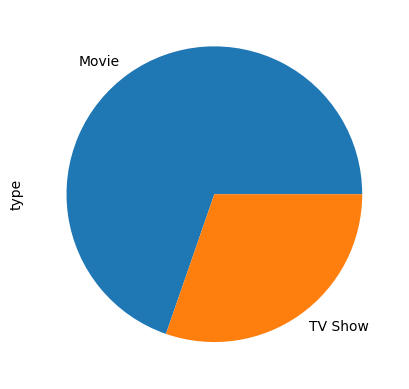

In [31]:
netflix_file['type'].value_counts().plot(kind="pie")

To be honest I still don't know how to put the percentage and values of each TV Show Vs Movie INSIDE THE PIE CHART. I googled it but it seems so complicated OMG!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
So, I will do it manually using my logic instead. hehehehe

In [32]:
movie_total = 6126
tvshow_total = 2664
movie_percent = round(movie_total / (movie_total + tvshow_total) *100)
tvshow_percent = round(tvshow_total / (movie_total+tvshow_total) *100)

In [33]:
print(f"The percentage of Movie is {movie_percent}%")
print(f"The percentage of TV Show is {tvshow_percent}%")

The percentage of Movie is 70%
The percentage of TV Show is 30%


## 2) NUMBER OF TITLE BY RELEASE YEAR OF YEAR 2000 AND MORE 
### how many title of movies and TV shows released by "release year" at year 2000 and more?

In [34]:
netflix_file.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,duration_trim
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,90
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,1
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,2


HERE I WANT TO MAKE A PIVOT TABLE OR CROSSTAB TO SHOW NUMBER OF SHOW TYPE BASED ON RELEASE YEAR. BUT I WAS SO CONFUSE SO I TRIED SOME WAYS TO GET THERE.

In [35]:
#pivot = netflix_file.pivot_table(index =['release_year'], values =['show_id'], aggfunc =sum)
#print(pivot)

In [36]:
#show_id_list = netflix_file['show_id'].tolist()

In [37]:
#show_id_list

In [38]:
#pivot = netflix_file.pivot_table(index =['release_year'], values =['release_year'], aggfunc ='sum')
#print(pivot)

In [39]:
#months = np.array([2000, 2001, 2002])
#cross = pd.crosstab(months,netflix_file['release_year'],values=None, rownames=['release_year'], colnames=['amount'])

In [40]:
cross=dict(netflix_file.groupby('release_year')['show_id'].count())
cross
#cross_year = {}
#for item in cross.keys():
   # if item >= 2000:
        #cross_year.append(cross.items())
#print(cross_year)

{1925: 1,
 1942: 2,
 1943: 3,
 1944: 3,
 1945: 4,
 1946: 2,
 1947: 1,
 1954: 2,
 1955: 3,
 1956: 2,
 1958: 3,
 1959: 1,
 1960: 4,
 1961: 1,
 1962: 3,
 1963: 2,
 1964: 2,
 1965: 2,
 1966: 1,
 1967: 5,
 1968: 3,
 1969: 2,
 1970: 2,
 1971: 5,
 1972: 5,
 1973: 10,
 1974: 7,
 1975: 7,
 1976: 9,
 1977: 7,
 1978: 7,
 1979: 11,
 1980: 11,
 1981: 13,
 1982: 17,
 1983: 11,
 1984: 12,
 1985: 10,
 1986: 13,
 1987: 8,
 1988: 18,
 1989: 16,
 1990: 22,
 1991: 17,
 1992: 23,
 1993: 28,
 1994: 22,
 1995: 25,
 1996: 24,
 1997: 38,
 1998: 36,
 1999: 39,
 2000: 37,
 2001: 45,
 2002: 51,
 2003: 59,
 2004: 64,
 2005: 80,
 2006: 96,
 2007: 88,
 2008: 135,
 2009: 152,
 2010: 192,
 2011: 185,
 2012: 236,
 2013: 286,
 2014: 352,
 2015: 555,
 2016: 901,
 2017: 1030,
 2018: 1146,
 2019: 1030,
 2020: 953,
 2021: 592}

In [ ]:
I FINALLY GET THE NUMBER OF SHOW BY RELEASE YEAR. BUT I DO NOT KNOW HOW TO ACCESSING ONLY RELEASE YEAR 2000 AND MORE?
SINCE I DO NOT KNOW WHAT TYPE OF THIS OUTPUT. IS IT A DATAFRAME, OR LIST, OR WHAT. 
WHEN I TRIED TO ACCESS [2000] PYTHON WAS CONFUSE BECAUSE IT CAN BE INDEX= 2000 OR VALUE BY 2000? 
SO I TRIED ANOTHER WAY. 

In [41]:
#cross=netflix_file.groupby('release_year')['show_id'].count()pivot = netflix_file.pivot_table(index =['release_year'][2000:2023], values = cross, aggfunc ='sum')

In [42]:
#cross=netflix_file.groupby(['release_year','show_id']).count()
#cross

In [43]:
release2000= netflix_file.drop(netflix_file[netflix_file['release_year'] < 2000].index)
release2000=release2000.sort_values(by=['release_year'], ascending = False)
release2000.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,duration_trim
755,s756,Movie,Kitty Love: An Homage to Cats,NaN,Nicolette Kluijver,Netherlands,2021-06-05,2021,TV-G,61 min,"Children & Family Movies, Documentaries, Inter...",Famous feline Abatutu presents this charming c...,2021,61
826,s827,Movie,Bo Burnham: Inside,Bo Burnham,Bo Burnham,United States,2021-05-30,2021,TV-MA,88 min,Stand-Up Comedy,A new comedy special shot and performed by Bo ...,2021,88
768,s769,Movie,Dancing Queens,Helena Bergström,"Molly Nutley, Fredrik Quiñones, Marie Göranzon...",Sweden,2021-06-03,2021,TV-MA,111 min,"Comedies, Dramas, International Movies",A dancer who gets a job cleaning at a struggli...,2021,111
770,s771,Movie,Myriam Fares: The Journey,Myriam Fares,Myriam Fares,United Arab Emirates,2021-06-03,2021,TV-14,72 min,"Documentaries, International Movies, Music & M...","From pregnancy to album preparations, Lebanese...",2021,72
771,s772,TV Show,Pretty Guardian Sailor Moon Eternal The Movie,Chiaki Kon,"Kotono Mitsuishi, Hisako Kanemoto, Rina Satou,...",NaN,2021-06-03,2021,TV-14,1 Season,TV Shows,When a dark power enshrouds the Earth after a ...,2021,1


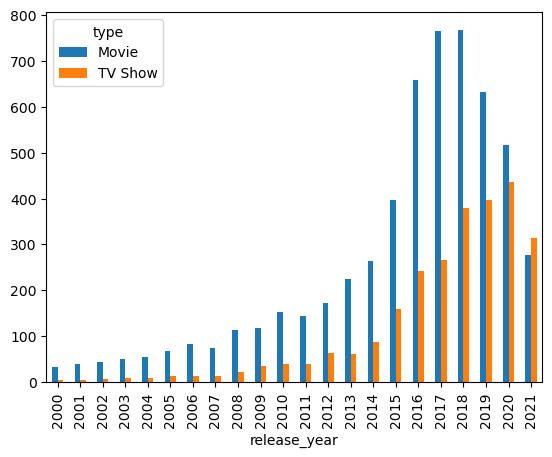

In [54]:
cross = pd.crosstab(index = release2000['release_year'], columns = release2000['type'])
cross.plot(kind='bar', stacked=False)
plt.show()
#print(cross)

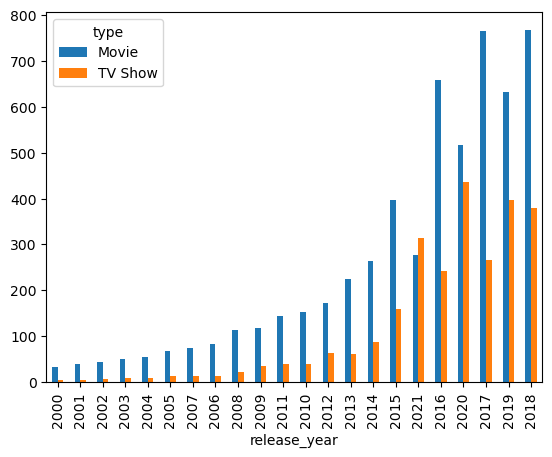

In [55]:
# I got this code from google, but I do not really understand those parameters. (need to learn more about it)
tab= pd.crosstab(release2000['release_year'], release2000['type'],margins=True).sort_values("All", ascending=True)
tab = tab.drop('All',axis=1)
tab = tab.drop('All',axis=0)
tab.plot(kind='bar', stacked=False)
plt.show()

In [47]:
print(tab)

type          Movie  TV Show
release_year                
2000             33        4
2001             40        5
2002             44        7
2003             51        8
2004             55        9
2005             67       13
2007             74       14
2006             82       14
2008            113       22
2009            118       34
2011            145       40
2010            153       39
2012            173       63
2013            225       61
2014            264       88
2015            396      159
2021            277      315
2016            658      243
2020            517      436
2017            765      265
2019            633      397
2018            767      379


In [48]:
#cross = pd.crosstab(index = netflix_file['release_year'], columns = netflix_file['type'])

<Axes: xlabel='release_year'>

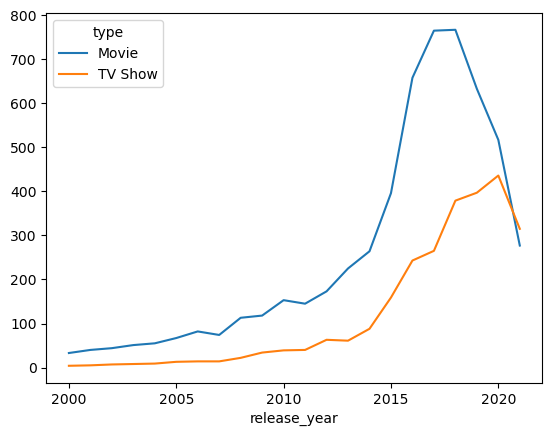

In [49]:
cross.plot(kind = 'line')

## 3) TOP 5 MOVIES HAVE A LONGEST DURATION
### WHAT ARE THE TOP 5 MOVIE TITLE THAT HAVE THE LONGEST DURATION?

In [56]:
netflix_file.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,duration_trim
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,90
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,1
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,2


In [57]:
netflix_file_dur = netflix_file.sort_values(by=['duration_trim'], ascending = False)

In [58]:
netflix_file_dur.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,duration_trim
4253,s4254,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,2018-12-28,2018,TV-MA,312 min,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",2018,312
717,s718,Movie,Headspace: Unwind Your Mind,NaN,"Andy Puddicombe, Evelyn Lewis Prieto, Ginger D...",NaN,2021-06-15,2021,TV-G,273 min,Documentaries,"Do you want to relax, meditate or sleep deeply...",2021,273
2491,s2492,Movie,The School of Mischief,Houssam El-Din Mustafa,"Suhair El-Babili, Adel Emam, Saeed Saleh, Youn...",Egypt,2020-05-21,1973,TV-14,253 min,"Comedies, Dramas, International Movies",A high school teacher volunteers to transform ...,2020,253
2487,s2488,Movie,No Longer kids,Samir Al Asfory,"Said Saleh, Hassan Moustafa, Ahmed Zaki, Youne...",Egypt,2020-05-21,1979,TV-14,237 min,"Comedies, Dramas, International Movies",Hoping to prevent their father from skipping t...,2020,237
2484,s2485,Movie,Lock Your Girls In,Fouad El-Mohandes,"Fouad El-Mohandes, Sanaa Younes, Sherihan, Ahm...",NaN,2020-05-21,1982,TV-PG,233 min,"Comedies, International Movies, Romantic Movies",A widower believes he must marry off his three...,2020,233


In [59]:
#I don't know how to subsetting the dataframe, so I subset it and store it to List type instead.
top5moviedur = netflix_file_dur['duration_trim'][0:5].tolist()
top5moviedur

[312, 273, 253, 237, 233]

In [61]:
top5movietitle = netflix_file_dur['title'][0:5].tolist()
top5movietitle

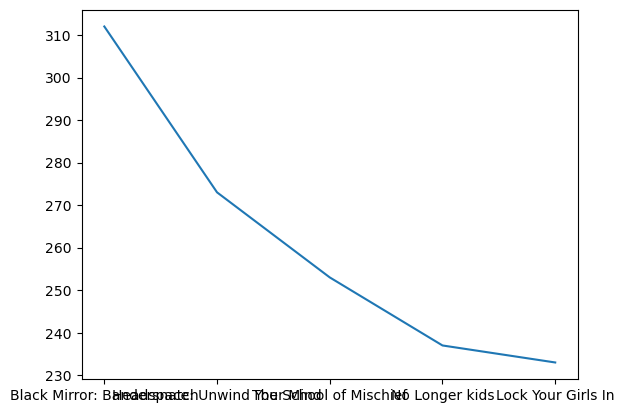

In [64]:
plt.plot(top5movietitle, top5moviedur)
plt.show()

TOP 5 MOVIE WITH THE LONGEST DURATION IN NETFLIX


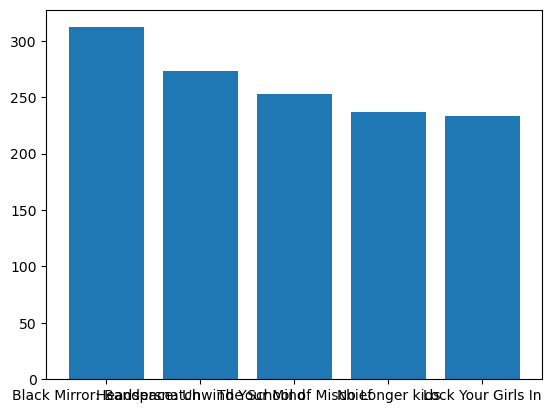

In [66]:
plt.bar(top5movietitle, top5moviedur)
print("TOP 5 MOVIE WITH THE LONGEST DURATION IN NETFLIX")
plt.show()

I NEED HELP, I DON'T KNOW HOW TO ROTATE THE X LABEL TO BECOME A VERTICAL. I WANT IT TO BE CLEAR AND READ-ABLE

## TOP 5 TV SHOW WITH THE MOST EPISODE

In [ ]:
netflix_file.head()

In [ ]:
#top5tvshow = netflix_file.sort_values(by=['type'], ascending = False)
#top5tvshow.head()

In [68]:
tvshow= netflix_file.drop(netflix_file[netflix_file['type'] == "Movie"].index)
tvshow.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,duration_trim
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,1
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,2
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,1


In [69]:
tvshow_dur = tvshow.sort_values(by=['duration_trim'], ascending = False)

In [70]:
tvshow_dur.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,duration_trim
548,s549,TV Show,Grey's Anatomy,NaN,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,2021-07-03,2020,TV-14,17 Seasons,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...,2021,17
2423,s2424,TV Show,Supernatural,Phil Sgriccia,"Jared Padalecki, Jensen Ackles, Mark Sheppard,...","United States, Canada",2020-06-05,2019,TV-14,15 Seasons,"Classic & Cult TV, TV Action & Adventure, TV H...","Siblings Dean and Sam crisscross the country, ...",2020,15
4798,s4799,TV Show,NCIS,NaN,"Mark Harmon, Michael Weatherly, Pauley Perrett...",United States,2018-07-01,2017,TV-14,15 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries",Follow the quirky agents of the NCIS – the Nav...,2018,15
4220,s4221,TV Show,COMEDIANS of the world,NaN,"Neal Brennan, Chris D'Elia, Nicole Byer, Nick ...",United States,2019-01-01,2019,TV-MA,13 Seasons,"Stand-Up Comedy & Talk Shows, TV Comedies",This global stand-up comedy series features a ...,2019,13
1354,s1355,TV Show,Heartland,NaN,"Amber Marshall, Michelle Morgan, Graham Wardle...",Canada,2021-02-01,2019,TV-14,13 Seasons,TV Dramas,Spunky teenager Amy is reeling from the sudden...,2021,13


In [71]:
top5tvshow_dur = tvshow_dur['duration_trim'][0:5].tolist()
top5tvshow_dur

In [73]:
top5tvshow_title = tvshow_dur['title'][0:5].tolist()
top5tvshow_title

["Grey's Anatomy",
 'Supernatural',
 'NCIS',
 'COMEDIANS of the world',
 'Heartland']

TOP 5 TV SHOW WITH THE MOST SEASON ON NETFLIX


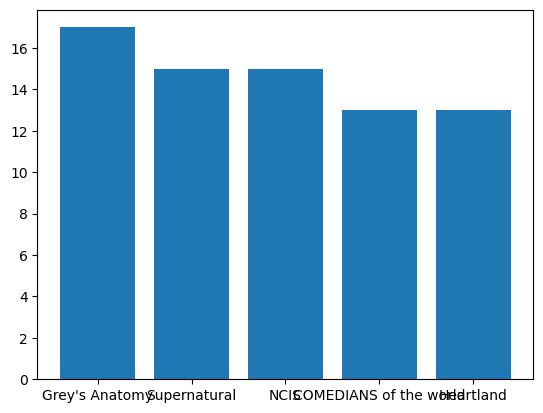

In [75]:
plt.bar(top5tvshow_title, top5tvshow_dur)
print("TOP 5 TV SHOW WITH THE MOST SEASON ON NETFLIX")
plt.show()

STILL I DON'T KNOW HOW TO TO ROTATE THE X LABEL TO BECOME A VERTICAL

In [ ]:
#top5tvshow_=plt.hist(tvshow_dur.title[0:5], bins = 5)


In [ ]:
#sns.set_style('white')
#tvshow_dur.hist(figsize = [12,8])

# THE END
## I REALISE THERE ARE MANY MISTAKES AND UNCLEAR CODES. I WILL IMPROVE MY SKILL MORE AND MORE. HOPEFULLY I CAN IMPROVE IT WAY BETTER THAN THIS.